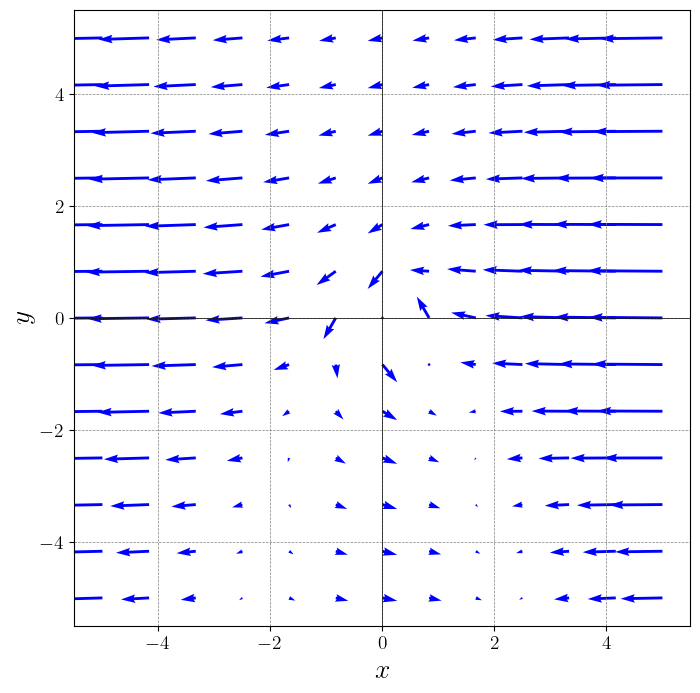

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Enable LaTeX style text rendering
plt.rcParams['text.usetex'] = True

# Add a disk to resemble Earth
earth_radius = 2.0

# Define the grid for the field
x = np.linspace(-5, 5, 13)  # X-axis range
y = np.linspace(-5, 5, 13)  # Y-axis range
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)  # Distance from the origin
R[R == 0] = 1e-10  # Avoid division by zero at the origin

# Components of the gravitational force
Fx = -(X**2+Y) / R
Fy = (+X-Y**2) / R**3

# Plot the force field using quiver
plt.figure(figsize=(8, 8))
force_multiplier = 1.2
plt.quiver(X, Y, force_multiplier*Fx, force_multiplier*Fy, scale=50, color='blue')
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Set tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# save the figure as a PDF
plt.savefig('force_field.pdf', bbox_inches='tight')

plt.show()

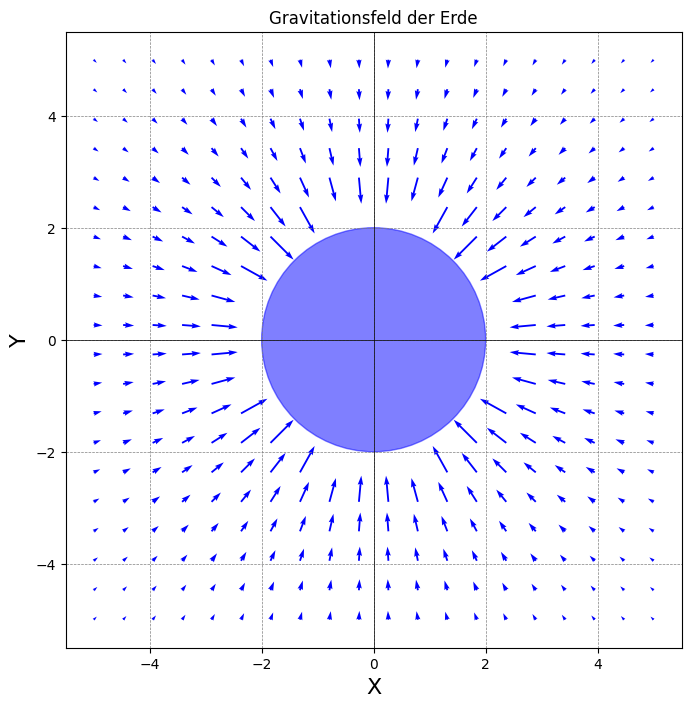

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Add a disk to resemble Earth
earth_radius = 2.0

# Define the grid for the field
x = np.linspace(-5, 5, 20)  # X-axis range
y = np.linspace(-5, 5, 20)  # Y-axis range
X, Y = np.meshgrid(x, y)

# Mask the points in the meshgrid for -2 < x < 2 and -2 < y < 2
R = np.sqrt(X**2 + Y**2)  # Distance from the origin
# mask = (X > -1) & (X < 1) & (Y > -1) & (Y < 1)
mask = (R < earth_radius*1.3)
X[mask] = np.nan
Y[mask] = np.nan

# Calculate the gravitational force field
# Gravitational force is proportional to -1 / r^2
# r is the distance from the origin (0, 0)
R = np.sqrt(X**2 + Y**2)  # Distance from the origin
R[R == 0] = 1e-10  # Avoid division by zero at the origin

# Components of the gravitational force
Fx = -X / R**3
Fy = -Y / R**3

# Plot the force field using quiver
plt.figure(figsize=(8, 8))
force_multiplier = 18
plt.quiver(X, Y, force_multiplier*Fx, force_multiplier*Fy, scale=50, color='blue')
plt.title("Gravitationsfeld der Erde")
plt.xlabel('X', size=16)
plt.ylabel('Y', size=16)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
# Add a disk to resemble Earth
earth = plt.Circle((0, 0), earth_radius, color='blue', fill=True, alpha=0.5)
plt.gca().add_artist(earth)
plt.show()

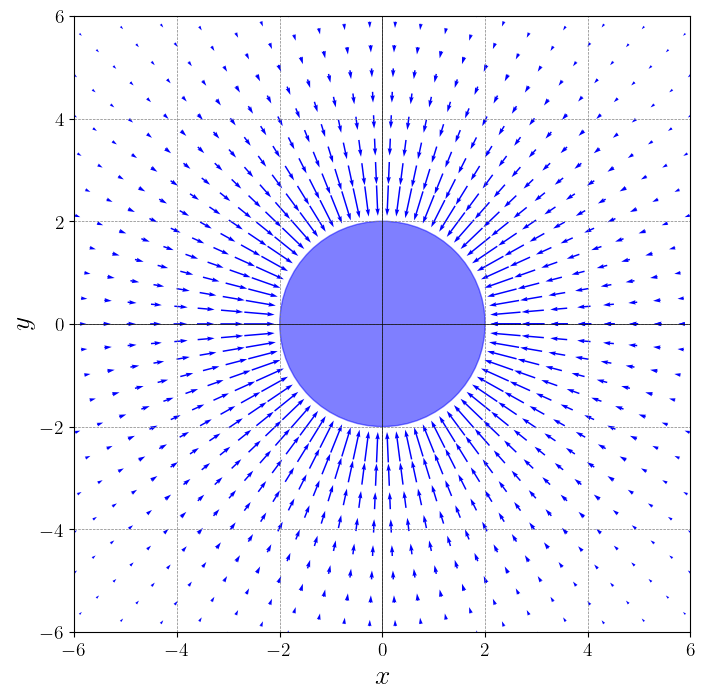

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
earth_radius = 2  # Earth's radius in some arbitrary units (e.g., 6.371 million meters)

# Define the radial grid
r = np.linspace(earth_radius+0.7, 10, 17)  # Radial distance (exclude r < earth_radius)
phi = np.linspace(0, 2 * np.pi, 75)  # Angular coordinate
R, Phi = np.meshgrid(r, phi)

# Convert radial coordinates to Cartesian coordinates
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

# Gravitational force in radial coordinates
# Magnitude of the force is proportional to -1 / r^2
Fr = -1 / R**2  # Radial force
Fphi = 0  # No tangential force in a central force field

# Convert force components to Cartesian coordinates
Fx = Fr * np.cos(Phi)
Fy = Fr * np.sin(Phi)

# Plot the force field using quiver
plt.figure(figsize=(8, 8))
force_multiplier = 18
plt.quiver(X, Y, force_multiplier*Fx, force_multiplier*Fy, scale=50, color='blue')
# plt.title("Earth's Gravitational Force Field (Radial Coordinates)", pad=20)
plt.xlabel('$x$', size=20)
plt.ylabel('$y$', size=20)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Set tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a disk to resemble Earth
earth = plt.Circle((0, 0), earth_radius, color='blue', fill=True, alpha=0.5)
plt.gca().add_artist(earth)



# save the figure as a PDF
plt.savefig('grav_field_example.pdf', bbox_inches='tight')


plt.show()

## Maxwell-Boltzmann distribution

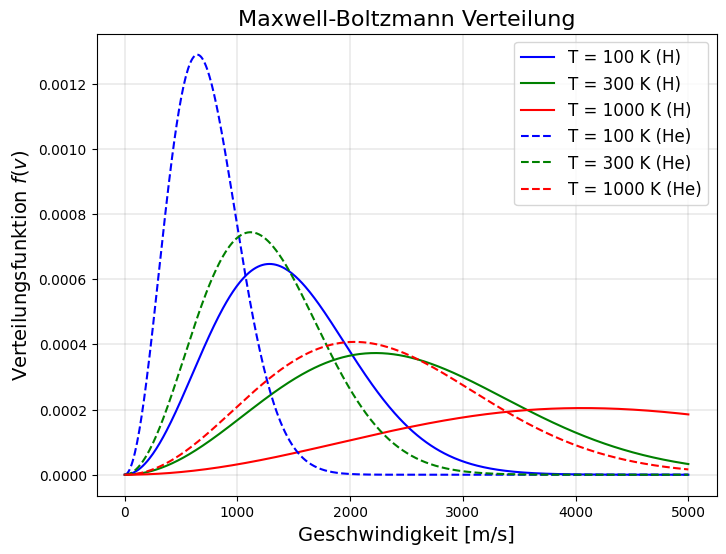

In [19]:
import numpy as np
import matplotlib.pyplot as plt

u = 1.660539066e-27
mHe = 4.002602*u
mH = 1.00784602*u


# Define the Maxwell-Boltzmann distribution function
def maxwell_boltzmann(m, T, v):
  k = 1.38e-23  # Boltzmann constant
  return (m / (2 * np.pi * k * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-(m * v**2) / (2 * k * T))



# Define velocity range
v = np.linspace(0, 5000, 500)

# Calculate distributions for different temperatures
T_values = [100, 300, 1000]
distributions_He = [maxwell_boltzmann(mHe, T, v) for T in T_values]
distributions_H = [maxwell_boltzmann(mH, T, v) for T in T_values]

# Plot the distributions
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Define colors for the plots
for T, dist, color in zip(T_values, distributions_H, colors):
  plt.plot(v, dist, label=f"T = {T} K (H)", color=color, linestyle='-')
for T, dist, color in zip(T_values, distributions_He, colors):
  plt.plot(v, dist, label=f"T = {T} K (He)", color=color, linestyle='--')

plt.title("Maxwell-Boltzmann Verteilung", fontsize=16)
plt.xlabel("Geschwindigkeit [m/s]", fontsize=14)
plt.ylabel("Verteilungsfunktion $f(v)$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

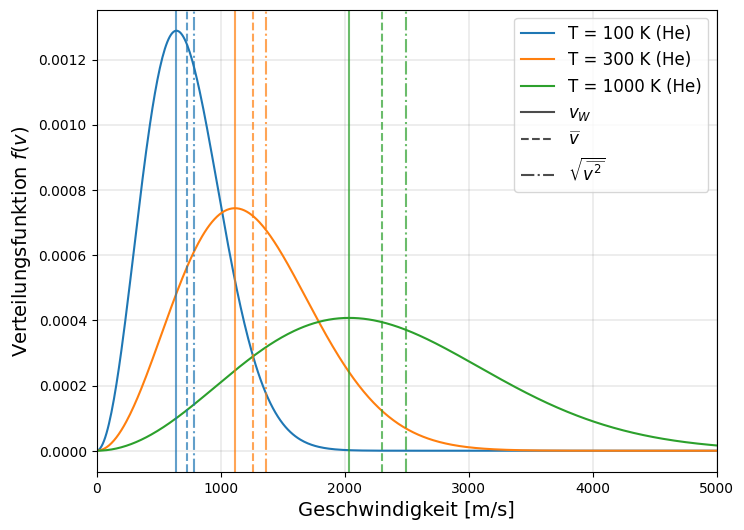

In [61]:
import numpy as np
import matplotlib.pyplot as plt

u = 1.660539066e-27
mHe = 4.002602*u
mH = 1.00784602*u


# Define the Maxwell-Boltzmann distribution function
def maxwell_boltzmann(m, T, v):
    k = 1.38e-23  # Boltzmann constant
    return (m / (2 * np.pi * k * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-(m * v**2) / (2 * k * T))

def vW(m, T):
    k = 1.38e-23  # Boltzmann constant
    return np.sqrt(2*k*T/m)

def vBar(m,T):
    return 2*vW(m,T)/np.sqrt(np.pi)

def vSquaredBar(m,T):
    return (3/2)*(vW(m,T)**2)


# Define velocity range
v = np.linspace(0, 5000, 500)

# Calculate distributions for different temperatures
T_values = [100, 300, 1000]
distributions_He = [maxwell_boltzmann(mHe, T, v) for T in T_values]
colors = ['tab:blue','tab:orange','tab:green']
# Plot the distributions
plt.figure(figsize=(8, 6))
for T, dist, color in zip(T_values, distributions_He, colors):
    plt.plot(v, dist, label=f"T = {T} K (He)", linestyle='-')

# Add lines for vW, vBar, and vSquaredBar
alpha_lines = 0.7
for T, color in zip(T_values, colors):
    vw = vW(mHe, T)
    vbar = vBar(mHe, T)
    vsquaredbar = np.sqrt(vSquaredBar(mHe, T))
    plt.axvline(vw, color=color, linestyle='-', alpha=alpha_lines)
    plt.axvline(vbar, color=color, linestyle='--', alpha=alpha_lines)
    plt.axvline(vsquaredbar, color=color, linestyle='-.', alpha=alpha_lines)

plt.axvline(-vw, linestyle='-', color='black', alpha=alpha_lines, label=f"$v_W$")
plt.axvline(-vbar, linestyle='--', color='black',alpha=alpha_lines, label=r"$\widebar{v}$")
plt.axvline(-vsquaredbar, linestyle='-.', color='black', alpha=alpha_lines, label=r"$\sqrt{\widebar{v^2}}$")


# plt.title("Maxwell-Boltzmann Verteilung", fontsize=16)
plt.xlim([0, 5000])
plt.xlabel("Geschwindigkeit [m/s]", fontsize=14)
plt.ylabel("Verteilungsfunktion $f(v)$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

In [63]:
[1, 2/np.sqrt(np.pi), np.sqrt(3/2)]

[1, 1.1283791670955126, 1.224744871391589]

In [68]:
mN2 = 4.67e-26
[vW(mN2, 300), vBar(mN2, 300), np.sqrt(vSquaredBar(mN2, 300))]

[421.07235387147045, 475.1292719484368, 515.7062058888678]

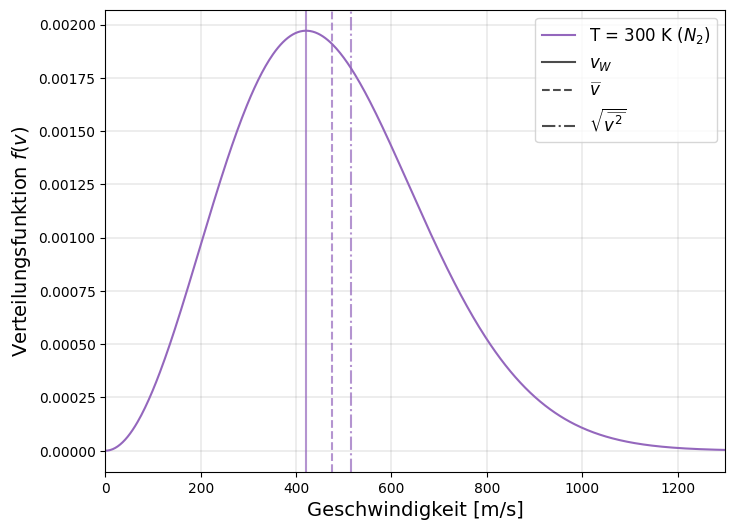

In [79]:
mN2 = 4.67e-26

# Define velocity range
v = np.linspace(0, 1300, 500)

# Calculate distributions for different temperatures
T_values = [300]
distributions_N2 = [maxwell_boltzmann(mN2, T, v) for T in T_values]
# colors = ['tab:blue','tab:orange','tab:green']
colors = ['tab:purple']
# Plot the distributions
plt.figure(figsize=(8, 6))
for T, dist, color in zip(T_values, distributions_N2, colors):
    plt.plot(v, dist, color=color, label=f"T = {T} K ($N_2$)", linestyle='-')

# Add lines for vW, vBar, and vSquaredBar
alpha_lines = 0.7
for T, color in zip(T_values, colors):
    vw = vW(mN2, T)
    vbar = vBar(mN2, T)
    vsquaredbar = np.sqrt(vSquaredBar(mN2, T))
    plt.axvline(vw, color=color, linestyle='-', alpha=alpha_lines)
    plt.axvline(vbar, color=color, linestyle='--', alpha=alpha_lines)
    plt.axvline(vsquaredbar, color=color, linestyle='-.', alpha=alpha_lines)

plt.axvline(-vw, linestyle='-', color='black', alpha=alpha_lines, label=f"$v_W$")
plt.axvline(-vbar, linestyle='--', color='black',alpha=alpha_lines, label=r"$\widebar{v}$")
plt.axvline(-vsquaredbar, linestyle='-.', color='black', alpha=alpha_lines, label=r"$\sqrt{\widebar{v^2}}$")


# plt.title("Maxwell-Boltzmann Verteilung", fontsize=16)
plt.xlim([0, 1300])
plt.xlabel("Geschwindigkeit [m/s]", fontsize=14)
plt.ylabel("Verteilungsfunktion $f(v)$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

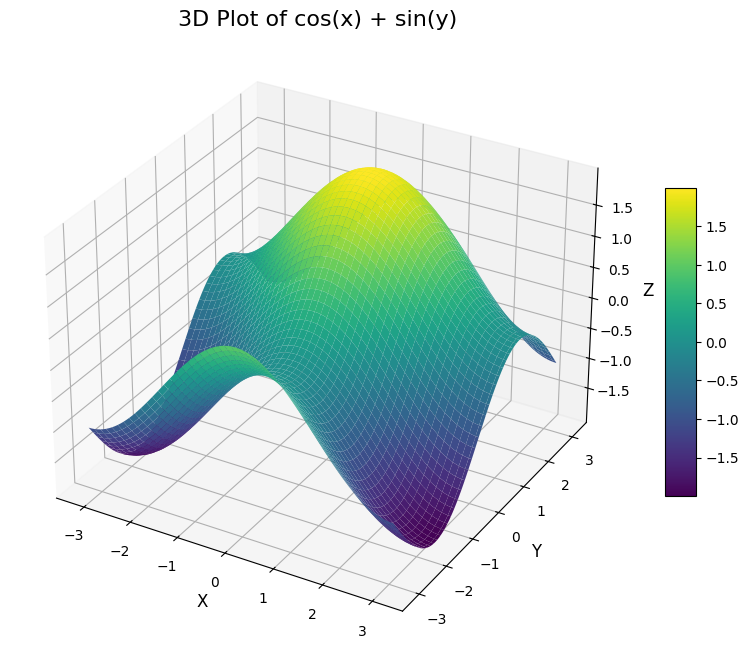

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Define the grid for x and y
x = np.linspace(-1 * np.pi, 1 * np.pi, 100)
y = np.linspace(-1 * np.pi, 1 * np.pi, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = np.cos(X) + np.sin(Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_title("3D Plot of cos(x) + sin(y)", fontsize=16)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)

# # Add adjustable x-limit
# x_min, x_max = -1 * np.pi, 1 * np.pi  # Define the range for x-limit
# ax.set_xlim([x_min, x_max])
# ax.set_ylim([x_min, x_max])

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

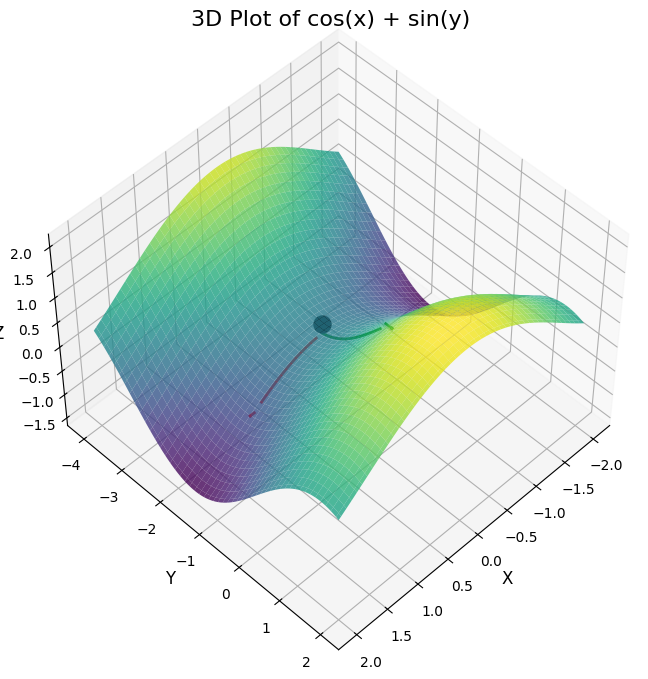

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Define the function g(x, y)
def g(x, y):
    return np.cos(x) + np.sin(y)

# Define the parameters
xp, yp = 0, -1.4
x1, y1 = 0, -1.4
xf1, yf1 = 1, 0
dg = 0.1

# Define the grid for x and y
x = np.linspace(-2, 2, 100)
y = np.linspace(-4,2, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = g(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='None', alpha=0.8)

# Add a parametric line along x at y = y1
x_line = np.linspace(0.1, xf1, 100)
y_line = np.full_like(x_line, y1)
z_line = g(x_line, y_line) + 0.02
ax.plot(x_line, y_line, z_line, color='red', linewidth=2)

# Add a parametric line along y at x = x1
y_line = np.linspace(y1, yf1, 100)
x_line = np.full_like(y_line, x1)
z_line = g(x_line, y_line) + 0.02
ax.plot(x_line, y_line, z_line, color='green', linewidth=2)

# Add a sphere at [xp, yp, g(xp, yp)]
ax.scatter(xp, yp, g(xp, yp)+0.2, color='black', s=150, alpha=1.0)

# Add arrows
ax.quiver(xf1 + 0.1, y1, g(xf1 + 0.1, y1), 0.1, 0, 0, color='red', linewidth=2)
ax.quiver(x1, yf1 + 0.1, dg + g(x1, yf1 + 0.1), 0, 0.2, 0, color='green', linewidth=2)

# Set the viewpoint
ax.view_init(elev=50, azim=45)  # Adjust elevation and azimuth angles as needed

# Set labels and title
ax.set_title("3D Plot of cos(x) + sin(y)", fontsize=16)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)

plt.show()

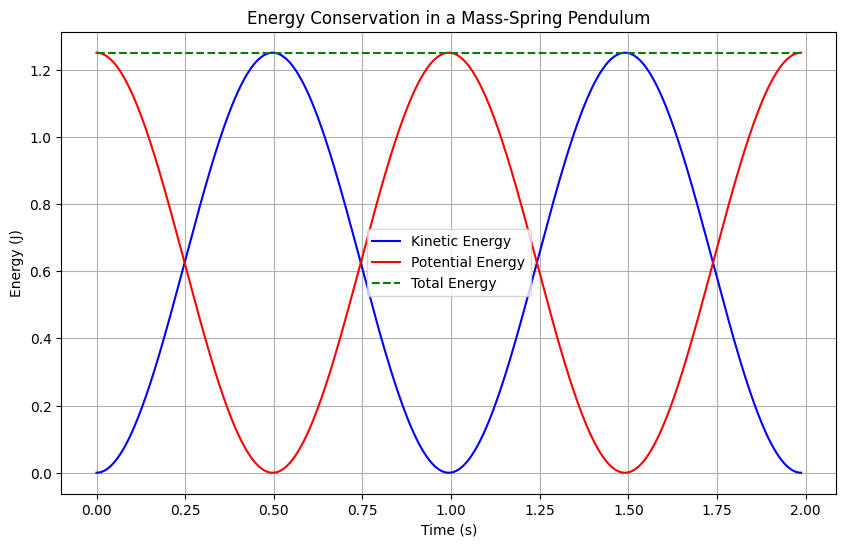

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mass-spring system
m = 1.0  # mass (kg)
k = 10.0  # spring constant (N/m)
A = 0.5  # amplitude (m)

# Angular frequency
omega = np.sqrt(k / m)

# Time array
t = np.linspace(0, 2 * np.pi / omega, 500)

# Position and velocity
x = A * np.cos(omega * t)
v = -A * omega * np.sin(omega * t)

# Kinetic, potential, and total energy
kinetic_energy = 0.5 * m * v**2
potential_energy = 0.5 * k * x**2
total_energy = kinetic_energy + potential_energy

# Plotting the energies
plt.figure(figsize=(10, 6))
plt.plot(t, kinetic_energy, label='Kinetic Energy', color='blue')
plt.plot(t, potential_energy, label='Potential Energy', color='red')
plt.plot(t, total_energy, label='Total Energy', color='green', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy Conservation in a Mass-Spring Pendulum')
plt.legend()
plt.grid(True)
plt.savefig('energy_conservation.png')

plt.show()

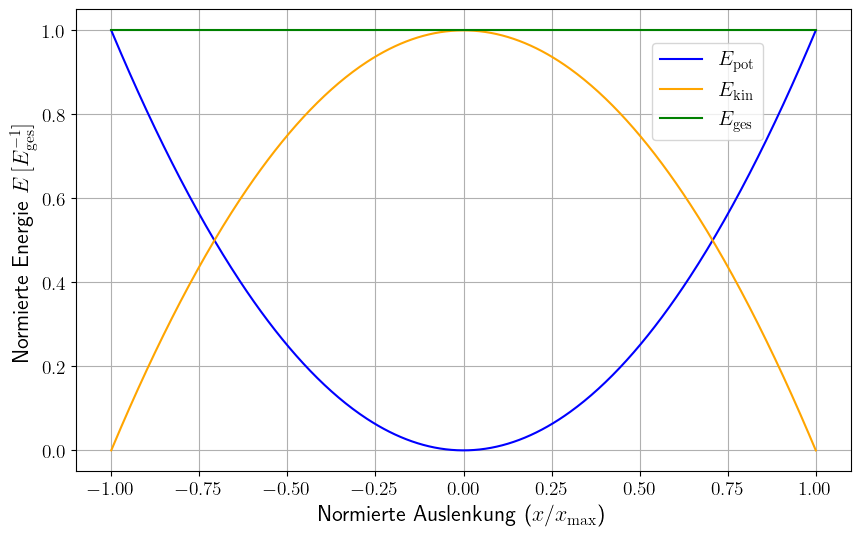

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# Enable LaTeX style text rendering
plt.rcParams['text.usetex'] = True

# Parameters for the mass-spring system
m = 1.0  # mass (kg)
k = 10.0  # spring constant (N/m)
A = 0.5  # amplitude (m)
vmax = np.sqrt(k/m) * A  # Maximum velocity
x = np.linspace(-A, A, 500)  # Displacement array
v = np.sqrt(k/m) * np.sqrt(A**2 - x**2)  # Velocity from energy conservation

kinetic_energy = 0.5 * m * v**2
potential_energy = 0.5 * k * x**2
total_energy = kinetic_energy + potential_energy

# Plotting the energies
plt.figure(figsize=(10, 6))
plt.plot(x/A, potential_energy/total_energy, label=r'$E_{\mathrm{pot}}$', color='blue')
plt.plot(x/A, kinetic_energy/total_energy, label=r'$E_{\mathrm{kin}}$', color='orange')
plt.plot(x/A, total_energy/total_energy, label=r'$E_{\mathrm{ges}}$', color='green')
plt.xlabel(r'Normierte Auslenkung ($x/x_{\mathrm{max}}$)', fontsize=16)
plt.ylabel(r'Normierte Energie $E \, [E_{\mathrm{ges}}^{-1}]$', fontsize=16)
plt.legend(fontsize=15, loc='upper right', bbox_to_anchor=(0.90, 0.95))
plt.grid(True)

# Set tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('normalized_energy_vs_displacement.png')

plt.show()